# Hello readers muid here

# We are here aimming to build a simple CNN using Keras, train it, evaluate its performance, and makes predictions on test data

# We are using CIFAR-100 dataset

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [2]:
df = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 1334s 8us/step


# Exploring data

In [26]:
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

Spiltting data

In [27]:
df = (x_train, y_train),(x_test,y_test)

In [28]:
x_train.shape         #50k images in training 

(50000, 32, 32, 3)

In [29]:
y_train.shape        #10k images in test

(50000, 1)

In [30]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
x_test.shape

(10000, 32, 32, 3)

In [33]:
y_test.shape

(10000, 1)

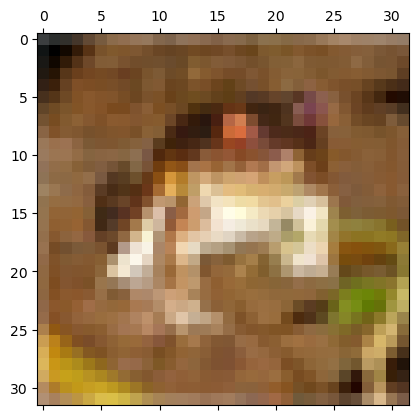

In [34]:
plt.matshow(x_train[0])

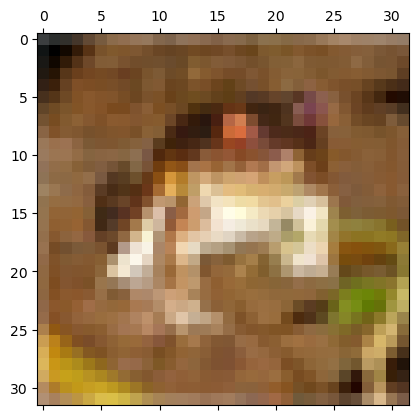

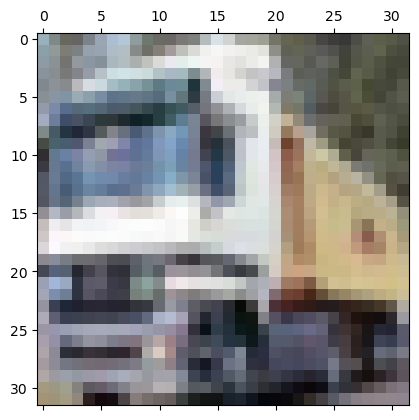

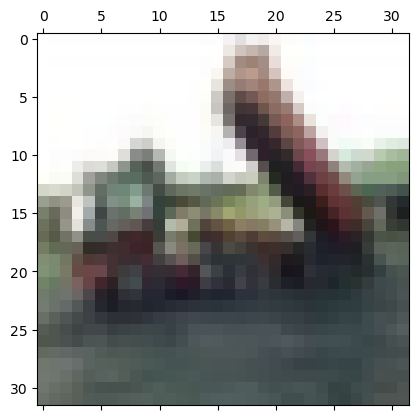

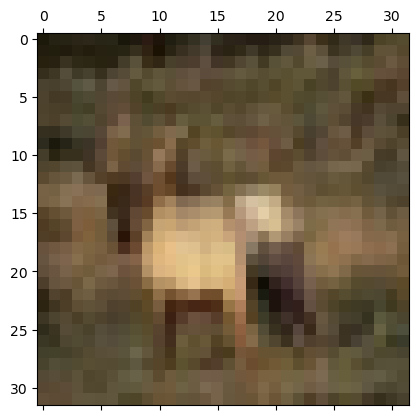

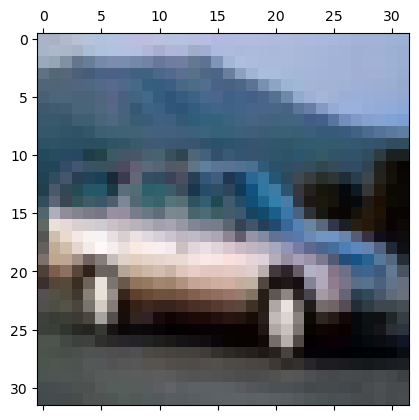

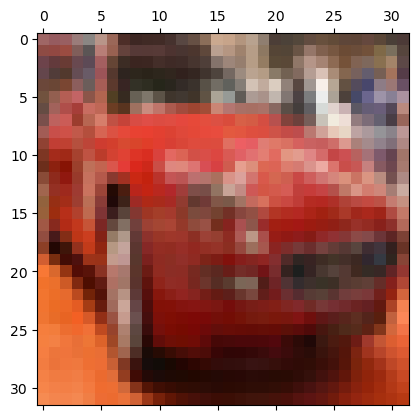

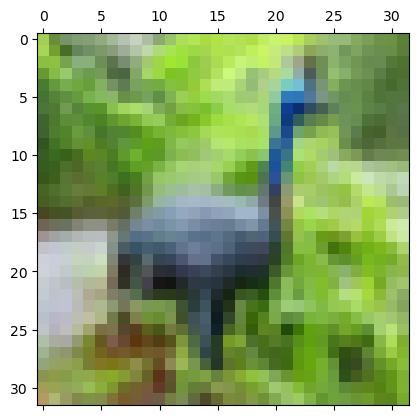

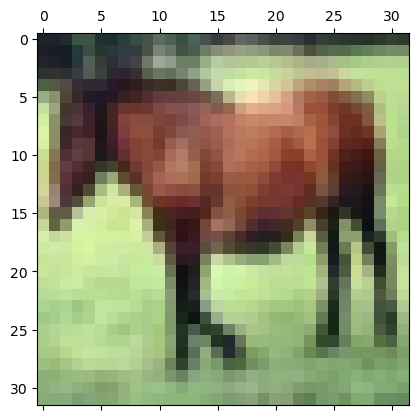

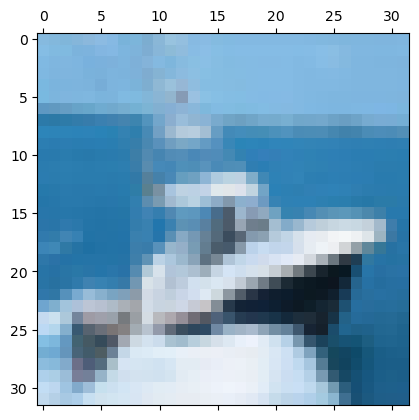

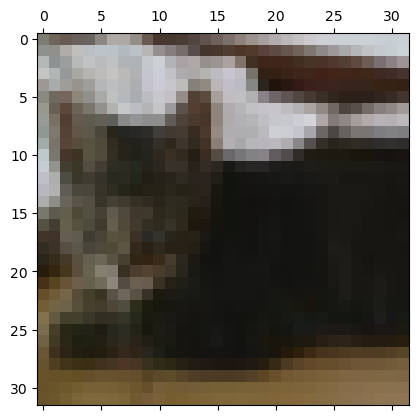

In [35]:
for i in range(10):
  plt.matshow(x_train[i])

# Type Conversion from array to float 
 for numerical stability and efficient memory usage during computations

In [37]:
x_train = x_train.astype('float32')         
x_test = x_test.astype('float32')

# Normalization
pixel values in images are typically represented as integers ranging from 0 to 255
 
 (0 being black and 255 being the maximum intensity for each color)
 
By dividing each pixel value by 255.0, all pixel values are scaled to fall within the range of 0 to 1

In [38]:
x_train /= 255.0              
x_test /= 255.0

# Model Building 

In [39]:
model = tf.keras.models.Sequential() 
# USING MULTIPLE LAYERS TO MAKE THE MODEL ACCURATE

#input shape is (32, 32, 3) for RGB images
model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))

# Add a 2D convolutional layer with 32 filters, each filter size is 3x3, activation is ReLU
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')) 

# Add a max pooling layer with pool size 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))) 

# Flatten the 3D output to 1D tensor for the fully connected layers
model.add(tf.keras.layers.Flatten())

# Add a dense (fully connected) layer with 300 neurons and activation is Softmax
model.add(tf.keras.layers.Dense(30, activation=tf.nn.softmax))

Configures the model for training by defining the loss function, optimizer, and metrics

In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


 Printing the summary of the model architecture

In [41]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 30)                245790    
                                                                 
Total params: 246686 (963.62 KB)
Trainable params: 246686 (963.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the model

BATCH SIZE 32 - Smaller batch sizes might help the model generalize better but might require more time for convergence 
due to more frequent weight updates

EPOCHS=20  - Means the model will iterate over the entire training dataset 20 times during the training process

(potentially improving performance up to a certain point. However, training for too many epochs might 
lead to overfitting if the model starts learning patterns specific to the training data that don't generalize well to new data.

In [42]:
model.fit(x_train, y_train, batch_size=32, epochs=20) 

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4865 - accuracy: 0.4774
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.2191 - accuracy: 0.5787
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1084 - accuracy: 0.6188
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0307 - accuracy: 0.6447
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9737 - accuracy: 0.6654
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9226 - accuracy: 0.6849
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8789 - accuracy: 0.6967
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8429 - accuracy: 0.7101
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8116 - accuracy: 0.7208
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step - l

Prediction Time 

In [43]:
pred = model.predict(x_test)
pred

313/313 [==============================] - 1s 3ms/step


array([[3.0118294e-04, 9.1927992e-05, 2.1362964e-03, ..., 1.4144600e-18,
        1.2006015e-18, 8.6039109e-19],
       [4.7145740e-04, 8.1048794e-03, 9.1895849e-08, ..., 1.4081721e-23,
        9.9004749e-24, 5.1206866e-24],
       [1.4498599e-01, 6.6366896e-02, 2.5337271e-02, ..., 1.8934126e-15,
        1.4442563e-15, 8.5547495e-16],
       ...,
       [7.8157240e-07, 6.3979678e-07, 6.9266737e-02, ..., 5.9305378e-14,
        1.0186291e-13, 7.1882523e-14],
       [1.9760652e-01, 6.1718774e-01, 6.9173177e-05, ..., 2.7485149e-19,
        2.8949150e-19, 4.7024413e-20],
       [7.2803355e-06, 3.2078937e-05, 7.2546951e-05, ..., 3.6260511e-15,
        3.9323793e-15, 4.5328968e-15]], dtype=float32)

Evaluate the model on test data

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1860 - accuracy: 0.6338


[1.1860121488571167, 0.6338000297546387]

In [48]:
# Evaluate the model on test data
test_loss,test_accuracy = model.evaluate(x_test, y_test)  # Evaluate the model's performance
print(f"Test accuracy: {test_accuracy}")  # Print test accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.1860 - accuracy: 0.6338
Test accuracy: 0.6338000297546387


# Our CNN model model does decently well on cifar100 data

Can achieve more by adding more hidden layer and tunning hyperperameters 